aliasing y los patrones de moire


Patrones Moire

El término Moiré, el cual proviene del francés, es un tipo particular de textil en seda que posee una apariencia ondeante o fluctuante, debido a los patrones de interferencia formados por la estructura del tejido.

El efecto Moiré se produce en fotografía, vídeo e incluso en la impresión, y aparece cuando se captura con una cámara un objeto que presenta una composición de líneas muy finas y repetitivas, como una chaqueta, una camiseta o un elemento decorativo. Este fenómeno ocurre debido a la interferencia entre el patrón del objeto y la rejilla del sensor de la cámara, generando un patrón ondulante o fluctuante que no está presente en la realidad. En la fotografía digital, este efecto también puede deberse a limitaciones propias de los sistemas electrónicos que conforman los sensores de imagen, los cuales no siempre logran interpretar correctamente los detalles finos, dando lugar a distorsiones visuales.

Efecto aliasing

El efecto aliasing ocurre cuando los píxeles del sensor no logran capturar adecuadamente todos los detalles de una imagen, ya sea en escenas estáticas o durante el movimiento. Aunque se espera que una cámara tenga la resolución suficiente para representar con fidelidad los detalles, en la práctica existen patrones con secuencias muy precisas que superan la capacidad del sensor, provocando distorsiones visuales. Este fenómeno genera artefactos como bordes dentados, líneas falsas o patrones no deseados. En fotografía de naturaleza o retratos es poco común encontrar aliasing, ya que generalmente no hay elementos repetitivos. Sin embargo, es más frecuente en imágenes que contienen estructuras arquitectónicas, ciertos tipos de telas o superficies con diseños regulares y detallados.


Referencias

NIIXER : https://niixer.com/index.php/2021/04/16/el-patron-moire-y-el-antialiasing/
FotoNostra: https://www.fotonostra.com/fotografia/moire.htm

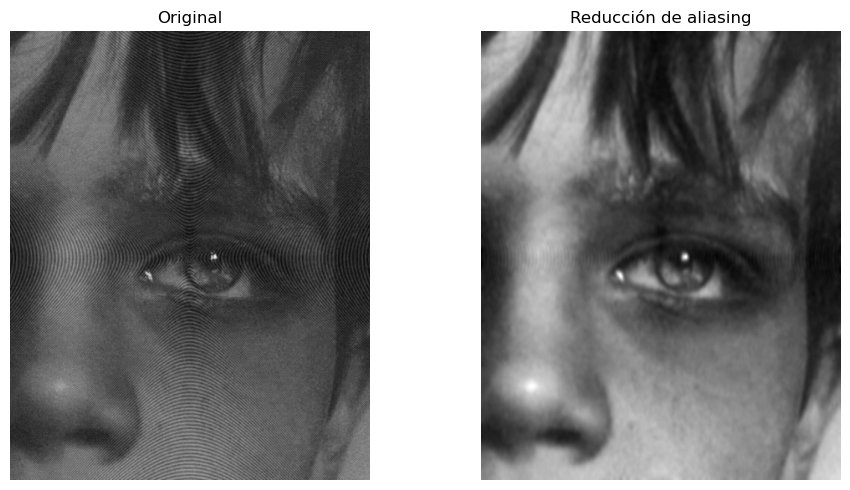

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('imagen1.jpeg', cv2.IMREAD_GRAYSCALE)


img_gauss = cv2.GaussianBlur(img, (9, 15), 0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Reducción de aliasing')
plt.imshow(img_gauss, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


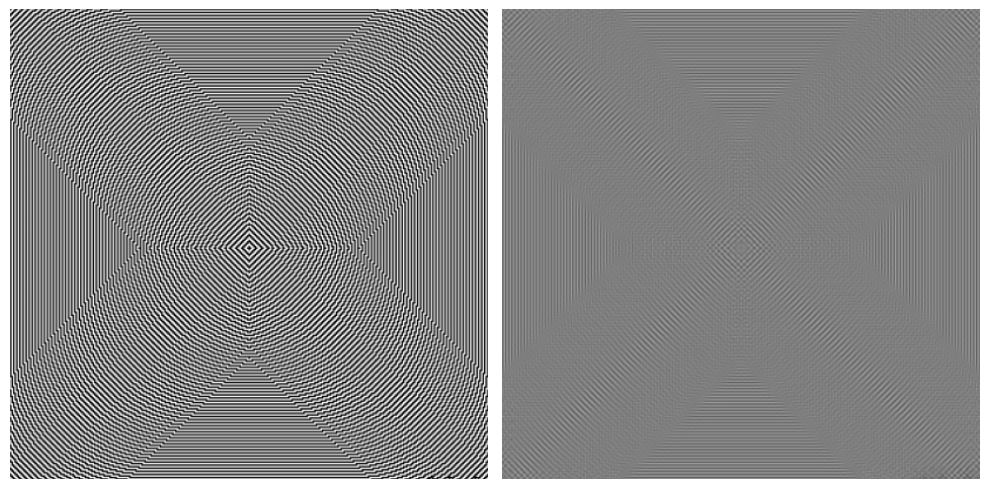

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolucion_media_direccionada(imagen, tamanioKernel):
    kernel_h = np.ones((1, tamanioKernel), np.float32) / tamanioKernel
    kernel_v = np.ones((tamanioKernel, 1), np.float32) / tamanioKernel
    kernel_d1 = np.eye(tamanioKernel, dtype=np.float32) / tamanioKernel
    kernel_d2 = np.fliplr(np.eye(tamanioKernel, dtype=np.float32)) / tamanioKernel

    img_h = cv2.filter2D(imagen, -1, kernel_h)
    img_v = cv2.filter2D(imagen, -1, kernel_v)
    img_d1 = cv2.filter2D(imagen, -1, kernel_d1)
    img_d2 = cv2.filter2D(imagen, -1, kernel_d2)

    return ((img_h.astype(np.float32) + img_v + img_d1 + img_d2) / 4).astype(np.uint8)

imagen = cv2.imread('imagen2.jpeg')
img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

r = convolucion_media_direccionada(img_rgb[:, :, 0], 25)
g = convolucion_media_direccionada(img_rgb[:, :, 1], 25)
b = convolucion_media_direccionada(img_rgb[:, :, 2], 25)

img_final = np.stack([r, g, b], axis=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_final)
plt.axis('off')

plt.tight_layout()
plt.show()


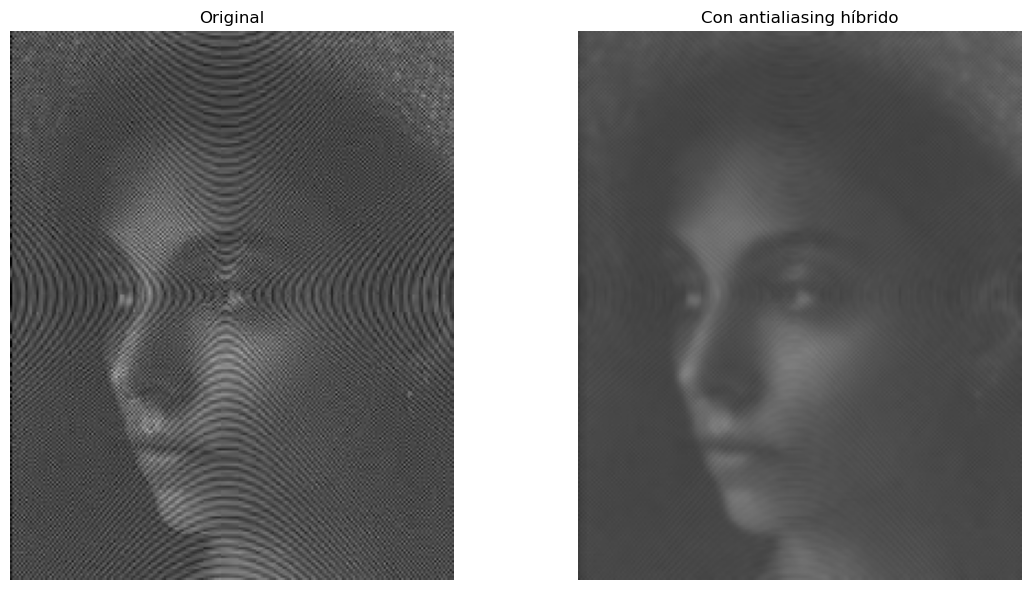

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def antialiasing_hibrido(imagen, tamanioKernel, sigma):
    imagen_gauss = cv2.GaussianBlur(imagen, (tamanioKernel, tamanioKernel), sigma)

    kernel_h = np.ones((1, tamanioKernel), np.float32) / tamanioKernel
    kernel_v = np.ones((tamanioKernel, 1), np.float32) / tamanioKernel
    kernel_d1 = np.eye(tamanioKernel, dtype=np.float32) / tamanioKernel
    kernel_d2 = np.fliplr(np.eye(tamanioKernel, dtype=np.float32)) / tamanioKernel

    img_h = cv2.filter2D(imagen, -1, kernel_h)
    img_v = cv2.filter2D(imagen, -1, kernel_v)
    img_d1 = cv2.filter2D(imagen, -1, kernel_d1)
    img_d2 = cv2.filter2D(imagen, -1, kernel_d2)

    direccional = (img_h.astype(np.float32) + img_v + img_d1 + img_d2) / 4
    hibrido = (0.5 * imagen_gauss.astype(np.float32) + 0.5 * direccional) / 1.0

    return np.clip(hibrido, 0, 255).astype(np.uint8)

imagen = cv2.imread('imagen3.jpeg')
img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

r = antialiasing_hibrido(img_rgb[:, :, 0], 7, 1.5)
g = antialiasing_hibrido(img_rgb[:, :, 1], 7, 1.5)
b = antialiasing_hibrido(img_rgb[:, :, 2], 7, 1.5)

img_final = np.stack([r, g, b], axis=2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Con antialiasing híbrido")
plt.imshow(img_final)
plt.axis('off')

plt.tight_layout()
plt.show()


Convolucion Diagonal

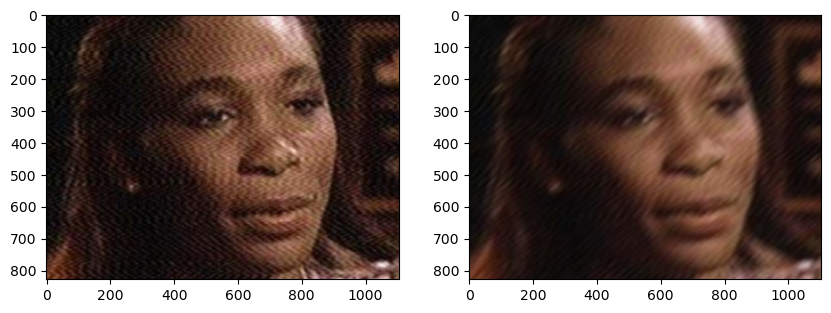

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolucion_media_diagonal_xy(imagen, tamanioKernel):
    kernel = np.zeros((tamanioKernel, tamanioKernel), np.float32)
    for i in range(tamanioKernel):
        kernel[i, tamanioKernel - i - 1] = 1.0
    kernel /= tamanioKernel
    imgfin = cv2.filter2D(imagen, -1, kernel)
    return imgfin

imagen = cv2.imread('distorsionada.jpeg')
img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

imgrest_r = convolucion_media_diagonal_xy(img_rgb[:, :, 0], 25)
imgrest_g = convolucion_media_diagonal_xy(img_rgb[:, :, 1], 25)
imgrest_b = convolucion_media_diagonal_xy(img_rgb[:, :, 2], 25)

imgcolor = np.stack([imgrest_r, imgrest_g, imgrest_b], axis=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.imshow(imgcolor)

plt.show()